In [1]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly


c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load dataset
df = pd.read_csv("cleaned_aapl_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [4]:
# 80% train, 20% test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [5]:
# Create and fit model
model = Prophet(daily_seasonality=True)
model.fit(train)


20:52:23 - cmdstanpy - INFO - Chain [1] start processing
20:52:30 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Create dataframe for future dates (same length as test)
future = model.make_future_dataframe(periods=len(test))

# Forecast
forecast = model.predict(future)


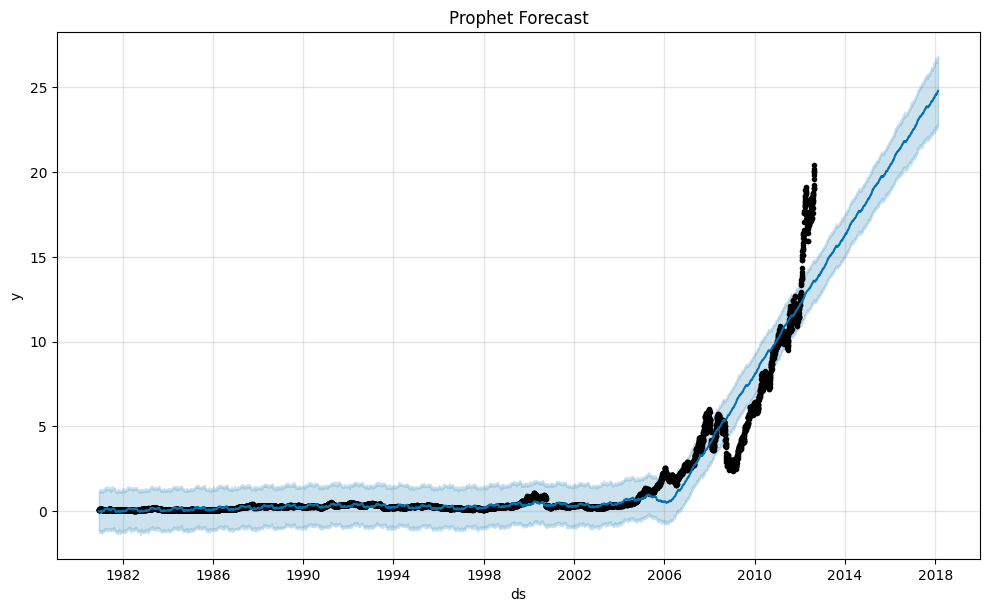

In [7]:
fig1 = model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()


In [8]:
# Align forecast with test period
forecast_test = forecast.iloc[-len(test):]
forecast_yhat = forecast_test['yhat'].values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['y'], forecast_yhat))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


Root Mean Squared Error (RMSE): 21.005


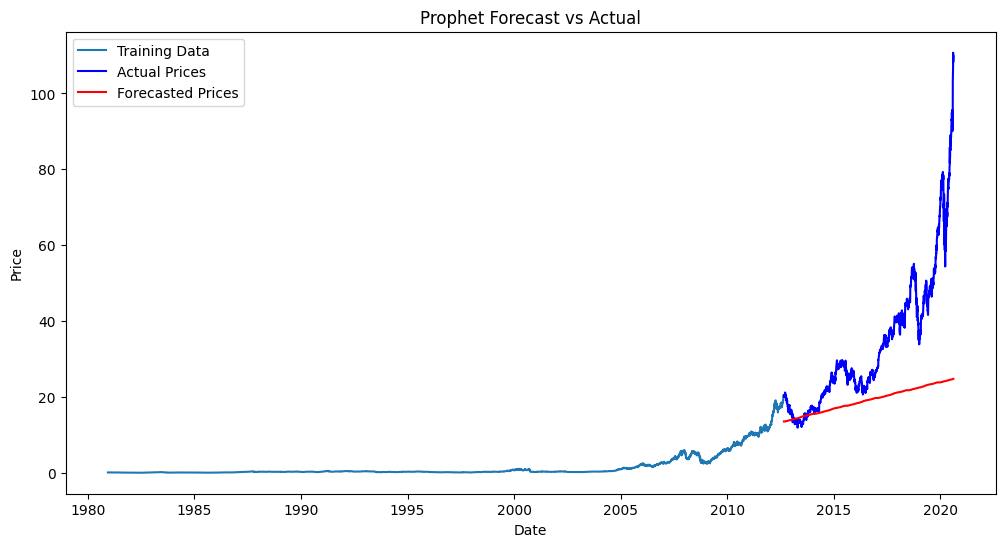

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Training Data')
plt.plot(test['ds'], test['y'], label='Actual Prices', color='blue')
plt.plot(test['ds'], forecast_yhat, label='Forecasted Prices', color='red')
plt.title('Prophet Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
